In [1]:
# Basic Imports & Dataset Download

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load data
file_path = "/home/surendran/rag_local/data/breast-cancer-wisconsin-data.csv"
df = pd.read_csv(file_path)


In [2]:
# Common setup (no PCA)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
## Pre-Modeling steps - for RBF and Polnomial kernels without WITHOUT PCAs

# features and labels
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis'].map({'M': 1, 'B': 0})

# train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# scale (IMPORTANT for kernels)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [4]:
# calculating Accuracy and confusion matrix for RBF (without PCA)

rbf_svc = SVC(kernel='rbf', gamma='scale', C=1.0)
rbf_svc.fit(X_train_scaled, y_train)

y_pred_rbf = rbf_svc.predict(X_test_scaled)

print("RBF SVC Accuracy (no PCA):", accuracy_score(y_test, y_pred_rbf))
print("RBF Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))


RBF SVC Accuracy (no PCA): 0.9736842105263158
RBF Confusion Matrix:
 [[72  0]
 [ 3 39]]


In [5]:
# calculating Accuracy and confusion matrix for Polynomial SVC (without PCA)

poly_svc = SVC(kernel='poly', degree=3, gamma='scale', C=1.0)
poly_svc.fit(X_train_scaled, y_train)

y_pred_poly = poly_svc.predict(X_test_scaled)

print("Polynomial SVC Accuracy (no PCA):", accuracy_score(y_test, y_pred_poly))
print("Polynomial Confusion Matrix:\n", confusion_matrix(y_test, y_pred_poly))

Polynomial SVC Accuracy (no PCA): 0.8859649122807017
Polynomial Confusion Matrix:
 [[72  0]
 [13 29]]


In [6]:
#  # Pre-Modeling steps (8 pcas)

# features and labels
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis'].map({'M': 1, 'B': 0})

# split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# PCA with 8 components
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)

In [7]:
# RBF Kernel SVC - with 8 pc

rbf_svc = SVC(kernel='rbf', gamma='scale', C=1.0)
rbf_svc.fit(X_train_pca, y_train)

y_pred_rbf = rbf_svc.predict(X_test_pca)

print("RBF SVC Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("RBF Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))

RBF SVC Accuracy: 0.956140350877193
RBF Confusion Matrix:
 [[71  1]
 [ 4 38]]


In [8]:
# Polynomial Kernel SVC - with 8 pc

poly_svc = SVC(kernel='poly', degree=3, gamma='scale', C=1.0)
poly_svc.fit(X_train_pca, y_train)

y_pred_poly = poly_svc.predict(X_test_pca)

print("Polynomial SVC Accuracy:", accuracy_score(y_test, y_pred_poly))
print("Polynomial Confusion Matrix:\n", confusion_matrix(y_test, y_pred_poly))

Polynomial SVC Accuracy: 0.8859649122807017
Polynomial Confusion Matrix:
 [[72  0]
 [13 29]]


In [9]:
#  # Pre-Modeling steps (2 pcas) - for better visualization 

# features and labels
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis'].map({'M': 1, 'B': 0})

# split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# PCA = 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)


In [10]:
# Helper: decision-boundary plot

def plot_boundary(model, X, y, title):
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, s=15)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title(title)


In [11]:
# 1️⃣ RBF Kernel SVC (PCA = 2)

rbf_svc = SVC(kernel='rbf', gamma='scale', C=1.0)
rbf_svc.fit(X_train_pca, y_train)

y_pred_rbf = rbf_svc.predict(X_test_pca)

print("RBF Accuracy (PCA=2):", accuracy_score(y_test, y_pred_rbf))
print("RBF Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))


RBF Accuracy (PCA=2): 0.9298245614035088
RBF Confusion Matrix:
 [[71  1]
 [ 7 35]]


In [12]:
# 2️⃣ Polynomial Kernel SVC (degree = 3, PCA = 2)

poly_svc = SVC(kernel='poly', degree=3, gamma='scale', C=1.0)
poly_svc.fit(X_train_pca, y_train)

y_pred_poly = poly_svc.predict(X_test_pca)

print("Polynomial Accuracy (PCA=2):", accuracy_score(y_test, y_pred_poly))
print("Polynomial Confusion Matrix:\n", confusion_matrix(y_test, y_pred_poly))


Polynomial Accuracy (PCA=2): 0.8947368421052632
Polynomial Confusion Matrix:
 [[72  0]
 [12 30]]


In [ ]:
## Visual plot for first 2 PCs - Linear, Polynomial & RBF SVC 

from sklearn.svm import SVC

linear_svc = SVC(kernel='linear', C=1.0)
poly_svc   = SVC(kernel='poly', degree=3, gamma='scale', C=1.0)
rbf_svc    = SVC(kernel='rbf', gamma='scale', C=1.0)

linear_svc.fit(X_train_pca, y_train)
poly_svc.fit(X_train_pca, y_train)
rbf_svc.fit(X_train_pca, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [17]:
import numpy as np
import matplotlib.pyplot as plt

def plot_boundary(ax, model, X, y, title):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.2)
    ax.scatter(X[:,0], X[:,1], c=y, s=15)
    ax.set_title(title)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")


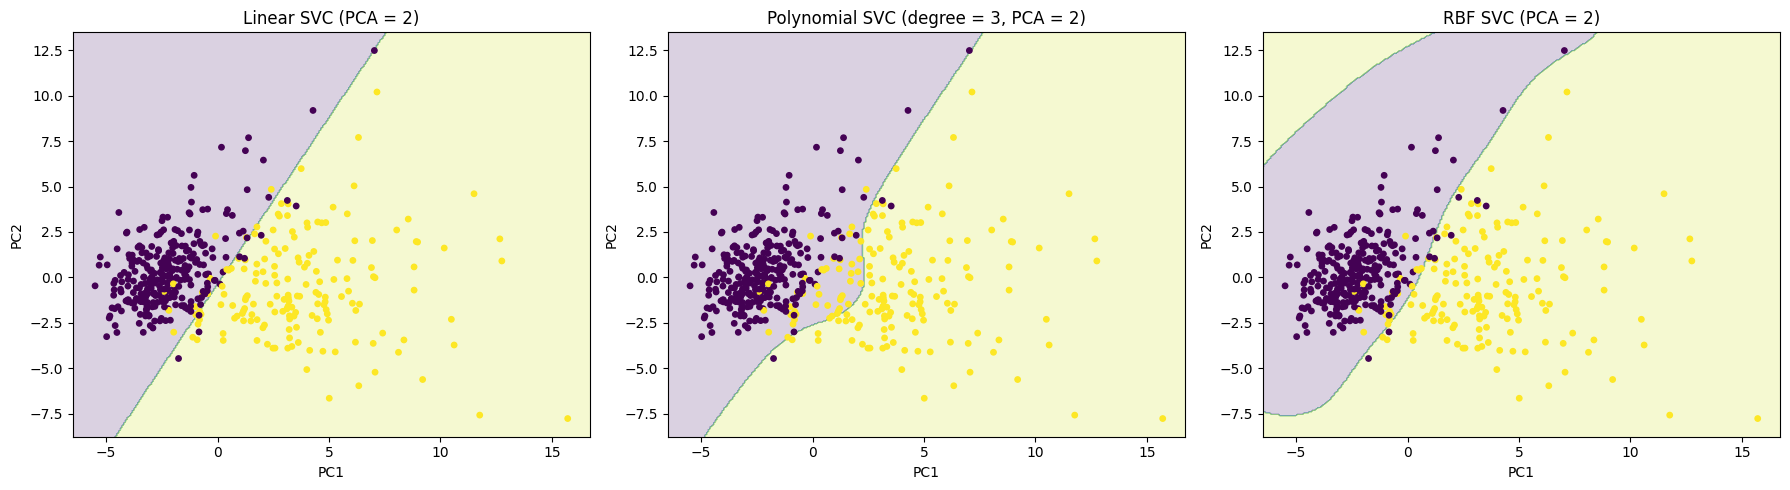

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_boundary(
    axes[0],
    linear_svc,
    X_train_pca,
    y_train,
    "Linear SVC (PCA = 2)"
)

plot_boundary(
    axes[1],
    poly_svc,
    X_train_pca,
    y_train,
    "Polynomial SVC (degree = 3, PCA = 2)"
)

plot_boundary(
    axes[2],
    rbf_svc,
    X_train_pca,
    y_train,
    "RBF SVC (PCA = 2)"
)

plt.tight_layout()
plt.show()

In [26]:
from sklearn.svm import SVC

linear_svc = SVC(kernel='linear', C=1.0)
poly_svc   = SVC(kernel='poly', degree=3, gamma='scale', C=1.0)
rbf_svc    = SVC(kernel='rbf', gamma='scale', C=1.0)

linear_svc.fit(X_train_pca, y_train)
poly_svc.fit(X_train_pca, y_train)
rbf_svc.fit(X_train_pca, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [27]:
models = {
    "Linear SVC": linear_svc,
    "Polynomial SVC": poly_svc,
    "RBF SVC": rbf_svc
}

for name, model in models.items():
    print(f"\n{name}")
    print("Support vectors per class:", model.n_support_)
    print("Total support vectors:", model.n_support_.sum())


Linear SVC
Support vectors per class: [33 33]
Total support vectors: 66

Polynomial SVC
Support vectors per class: [68 68]
Total support vectors: 136

RBF SVC
Support vectors per class: [44 47]
Total support vectors: 91


In [28]:
n_train = X_train_pca.shape[0]

for name, model in models.items():
    pct = model.n_support_.sum() / n_train * 100
    print(f"{name}: {pct:.2f}% of training samples are support vectors")

Linear SVC: 14.51% of training samples are support vectors
Polynomial SVC: 29.89% of training samples are support vectors
RBF SVC: 20.00% of training samples are support vectors


In [29]:
## Get the summary of support vectors across 3 variants with and without PCA

#Step 1: Common imports

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC


In [30]:
# Step 2: Prepare data (split once, reused)

X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis'].map({'M': 1, 'B': 0})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


In [31]:
#  Step 3: Helper to train models and collect SV stats

def get_sv_stats(X_train_rep, y_train):
    models = {
        "Linear SVC": SVC(kernel='linear', C=1.0),
        "Polynomial SVC": SVC(kernel='poly', degree=3, gamma='scale', C=1.0),
        "RBF SVC": SVC(kernel='rbf', gamma='scale', C=1.0)
    }

    stats = {}
    n_train = X_train_rep.shape[0]

    for name, model in models.items():
        model.fit(X_train_rep, y_train)
        sv_count = model.n_support_.sum()
        sv_pct = sv_count / n_train * 100
        stats[name] = f"{sv_count} ({sv_pct:.1f}%)"

    return stats


In [32]:
# Step 4: Collect stats for without PCA

stats_no_pca = get_sv_stats(X_train_scaled, y_train)

In [33]:
# Step 5: Collect stats for with PCA = 8

pca = PCA(n_components=8)
X_train_pca8 = pca.fit_transform(X_train_scaled)

stats_pca8 = get_sv_stats(X_train_pca8, y_train)

In [34]:
#Step 6: Final comparison table

sv_table = pd.DataFrame(
    [stats_no_pca, stats_pca8],
    index=["Without PCA", "With PCA = 8"]
)

print(sv_table)

             Linear SVC Polynomial SVC      RBF SVC
Without PCA   38 (8.4%)    149 (32.7%)  107 (23.5%)
With PCA = 8  37 (8.1%)    142 (31.2%)   98 (21.5%)


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Features and labels
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis'].map({'M': 1, 'B': 0})

split_ratios = [0.4, 0.3, 0.2, 0.1]  # test sizes
results = []

for test_size in split_ratios:

    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=42,
        stratify=y
    )

    # Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # PCA = 8
    pca = PCA(n_components=8)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Linear SVC
    model = SVC(kernel='linear', C=1.0)
    model.fit(X_train_pca, y_train)

    y_pred = model.predict(X_test_pca)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    FN = cm[1, 0]
    FP = cm[0, 1]

    sv_count = model.n_support_.sum()
    sv_pct = sv_count / X_train_pca.shape[0] * 100

    results.append([
        f"{int((1-test_size)*100)}:{int(test_size*100)}",
        acc,
        FN,
        FP,
        sv_count,
        round(sv_pct, 2)
    ])

# Create summary table
results_df = pd.DataFrame(
    results,
    columns=[
        "Split (Train:Test)",
        "Accuracy",
        "False Negatives",
        "False Positives",
        "Support Vectors",
        "SV %"
    ]
)

print(results_df)

  Split (Train:Test)  Accuracy  False Negatives  False Positives  \
0              60:40  0.969298                6                1   
1              70:30  0.982456                2                1   
2              80:20  0.982456                1                1   
3              90:10  1.000000                0                0   

   Support Vectors  SV %  
0               30  8.80  
1               37  9.30  
2               37  8.13  
3               40  7.81  


In [36]:
from sklearn.metrics import accuracy_score

split_ratios = [0.4, 0.3, 0.2, 0.1]
results = []

for test_size in split_ratios:

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=42,
        stratify=y
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca = PCA(n_components=8)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    model = SVC(kernel='linear', C=1.0)
    model.fit(X_train_pca, y_train)

    # Training accuracy
    train_acc = accuracy_score(y_train, model.predict(X_train_pca))

    # Test accuracy
    test_acc = accuracy_score(y_test, model.predict(X_test_pca))

    results.append([
        f"{int((1-test_size)*100)}:{int(test_size*100)}",
        round(train_acc, 4),
        round(test_acc, 4),
        round(train_acc - test_acc, 4)
    ])

results_df = pd.DataFrame(
    results,
    columns=["Split", "Train Accuracy", "Test Accuracy", "Gap"]
)

print(results_df)

   Split  Train Accuracy  Test Accuracy     Gap
0  60:40          0.9795         0.9693  0.0102
1  70:30          0.9774         0.9825 -0.0051
2  80:20          0.9802         0.9825 -0.0022
3  90:10          0.9766         1.0000 -0.0234
